In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import average_precision_score, f1_score, plot_confusion_matrix, accuracy_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


%matplotlib inline

# Preparing Dataset

In [ ]:
patients = pd.read_csv('PATIENTS.csv')
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [ ]:
admissions = pd.read_csv('ADMISSIONS.csv')
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [ ]:
ICU = pd.read_csv('ICUSTAYS.csv')
ICU.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [ ]:
diagnosis = pd.read_csv('DIAGNOSES_ICD.csv')
diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [ ]:
nicu_dataset = pd.merge(patients,admissions,on=['SUBJECT_ID','SUBJECT_ID'], how = 'inner')
nicu_dataset = pd.merge(nicu_dataset,ICU, on=['HADM_ID', 'HADM_ID'], how= 'inner')
nicu_dataset = pd.merge(nicu_dataset,diagnosis, on=['HADM_ID', 'HADM_ID'], how='inner')

In [ ]:
nicu_dataset.shape

(705921, 41)

In [ ]:
nicu_dataset.head()

,ROW_ID_x,SUBJECT_ID_x,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID_y,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_x,SUBJECT_ID_y,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,ROW_ID_y,SUBJECT_ID,SEQ_NUM,ICD9_CODE
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,338,249,215044,carevue,TSICU,MICU,23,12,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,2992,249,1.0,49322
1,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,338,249,215044,carevue,TSICU,MICU,23,12,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,2993,249,2.0,51882
2,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,338,249,215044,carevue,TSICU,MICU,23,12,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,2994,249,3.0,41071
3,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,338,249,215044,carevue,TSICU,MICU,23,12,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,2995,249,4.0,42841
4,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,338,249,215044,carevue,TSICU,MICU,23,12,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,2996,249,5.0,99812


In [ ]:
list(nicu_dataset)

['ROW_ID_x',
 'SUBJECT_ID_x',
 'GENDER',
 'DOB',
 'DOD',
 'DOD_HOSP',
 'DOD_SSN',
 'EXPIRE_FLAG',
 'ROW_ID_y',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS',
 'HOSPITAL_EXPIRE_FLAG',
 'HAS_CHARTEVENTS_DATA',
 'ROW_ID_x',
 'SUBJECT_ID_y',
 'ICUSTAY_ID',
 'DBSOURCE',
 'FIRST_CAREUNIT',
 'LAST_CAREUNIT',
 'FIRST_WARDID',
 'LAST_WARDID',
 'INTIME',
 'OUTTIME',
 'LOS',
 'ROW_ID_y',
 'SUBJECT_ID',
 'SEQ_NUM',
 'ICD9_CODE']

#Data Preprocessing 

In [ ]:
nicu_dataset.drop("ICUSTAY_ID", axis = 1, inplace = True)
nicu_dataset.drop("ROW_ID_x", axis = 1, inplace = True)
nicu_dataset.drop("SUBJECT_ID_x", axis = 1, inplace = True)
nicu_dataset.drop("SUBJECT_ID_y", axis = 1, inplace = True)
nicu_dataset.drop("ROW_ID_y", axis = 1, inplace = True)
nicu_dataset.drop("FIRST_WARDID", axis = 1, inplace = True)
nicu_dataset.drop("LAST_WARDID", axis = 1, inplace = True)


In [ ]:
list(nicu_dataset)

['GENDER',
 'DOB',
 'DOD',
 'DOD_HOSP',
 'DOD_SSN',
 'EXPIRE_FLAG',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS',
 'HOSPITAL_EXPIRE_FLAG',
 'HAS_CHARTEVENTS_DATA',
 'DBSOURCE',
 'FIRST_CAREUNIT',
 'LAST_CAREUNIT',
 'INTIME',
 'OUTTIME',
 'LOS',
 'SUBJECT_ID',
 'SEQ_NUM',
 'ICD9_CODE']

In [ ]:
nicu_dataset.head()

,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,INTIME,OUTTIME,LOS,SUBJECT_ID,SEQ_NUM,ICD9_CODE
0,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,carevue,TSICU,MICU,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,249,1.0,49322
1,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,carevue,TSICU,MICU,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,249,2.0,51882
2,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,carevue,TSICU,MICU,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,249,3.0,41071
3,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,carevue,TSICU,MICU,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,249,4.0,42841
4,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-12-17 11:10:00,2149-12-17 21:35:00,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,0,1,carevue,TSICU,MICU,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262,249,5.0,99812


In [ ]:
nicu_dataset.FIRST_CAREUNIT.value_counts()

MICU     290792
SICU     104945
CSRU      97191
CCU       93827
TSICU     72100
NICU      47066
Name: FIRST_CAREUNIT, dtype: int64

In [ ]:
nicu_dataset.ADMISSION_TYPE.unique()

array(['EMERGENCY', 'ELECTIVE', 'NEWBORN', 'URGENT'], dtype=object)

In [ ]:
nicu_dataset.shape

(705921, 32)

In [ ]:
nicu_dataset = nicu_dataset[nicu_dataset['FIRST_CAREUNIT'] == 'NICU']

In [ ]:
nicu_dataset.ADMISSION_TYPE.value_counts()

NEWBORN      45953
EMERGENCY      990
URGENT         101
ELECTIVE        22
Name: ADMISSION_TYPE, dtype: int64

In [ ]:
nicu_dataset.shape

(47066, 32)

# Data Exploration

In [ ]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport

# profile_report = ProfileReport(nicu_dataset)
# profile_report
# profile_report.to_file(output_file='output.html')

In [ ]:
nicu_dataset.columns

Index(['GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'HADM_ID',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'INTIME', 'OUTTIME', 'LOS',
       'SUBJECT_ID', 'SEQ_NUM', 'ICD9_CODE'],
      dtype='object')

In [ ]:
nicu_dataset.DISCHARGE_LOCATION.value_counts()

HOME                         25715
HOME HEALTH CARE             12875
SHORT TERM HOSPITAL           7808
DEAD/EXPIRED                   548
DISC-TRAN CANCER/CHLDRN H       39
REHAB/DISTINCT PART HOSP        22
LEFT AGAINST MEDICAL ADVI       18
HOSPICE-HOME                    15
SNF                             14
LONG TERM CARE HOSPITAL         12
Name: DISCHARGE_LOCATION, dtype: int64

## GENDER

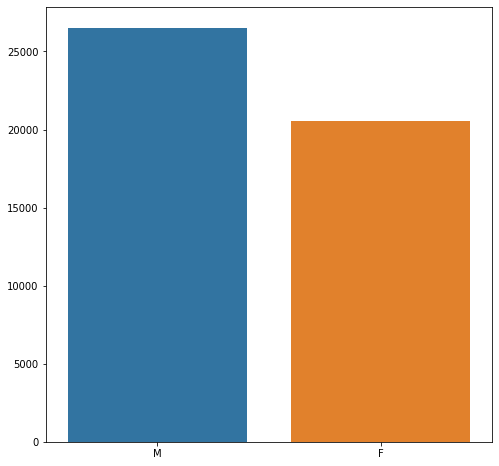

In [ ]:
gender = nicu_dataset["GENDER"].value_counts()
fig, ax = plt.subplots(figsize= (8, 8))
sns.barplot(ax = ax, x=gender.index, y=gender.values)

## LOS

In [ ]:
nicu_dataset['LOS'].describe()

count    47022.000000
mean        18.308783
std         28.210175
min          0.000800
25%          0.262300
50%          6.042000
75%         22.884400
max        171.622700
Name: LOS, dtype: float64

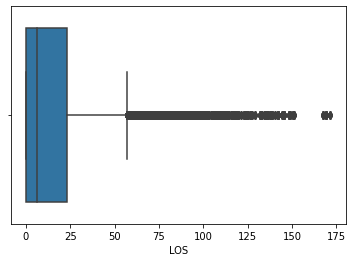

In [ ]:
ax = sns.boxplot(x=nicu_dataset['LOS'])

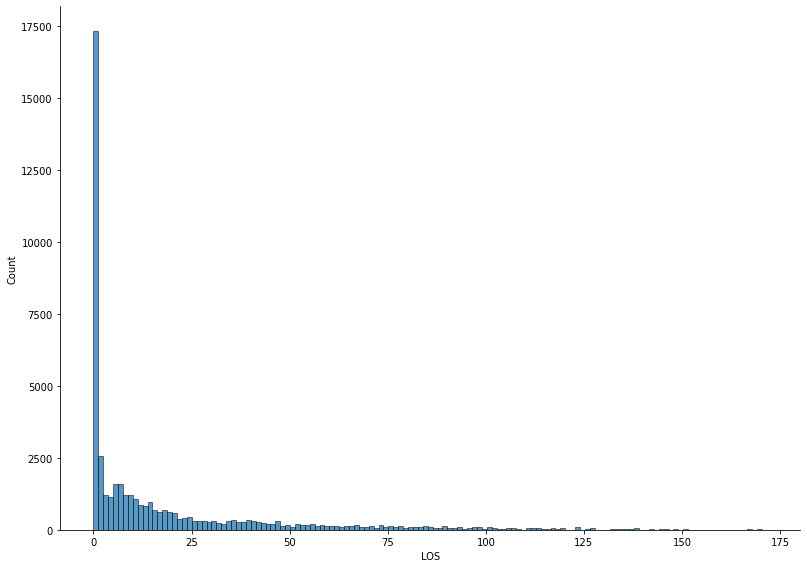

In [ ]:
sns.displot(nicu_dataset.LOS, height=8 , aspect=11.7/8.27)

##LANGUAGE

In [ ]:
nicu_dataset.LANGUAGE.value_counts()

ENGL    858
MAND    254
CAPE    238
PORT    230
CANT    183
PTUN    130
SPAN    126
VIET     59
RUSS     13
Name: LANGUAGE, dtype: int64

## SEQ NUM

In [ ]:
nicu_dataset.SEQ_NUM.value_counts()

1.0     8100
2.0     7995
3.0     7636
4.0     6021
5.0     4556
6.0     3519
7.0     2666
8.0     2003
9.0     1473
10.0     750
11.0     565
12.0     441
13.0     342
14.0     259
15.0     203
16.0     149
17.0     123
18.0      86
19.0      65
20.0      44
21.0      30
22.0      20
23.0      10
24.0       6
25.0       3
26.0       1
Name: SEQ_NUM, dtype: int64

## Deaths

0    46475
1      591
Name: EXPIRE_FLAG, dtype: int64


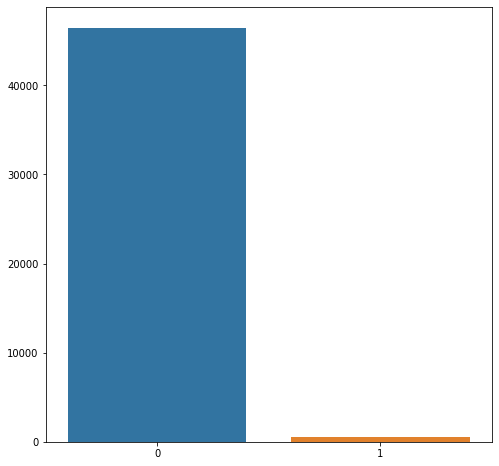

In [ ]:
expire = nicu_dataset["EXPIRE_FLAG"].value_counts()
print(expire)
fig, ax = plt.subplots(figsize= (8, 8))
sns.barplot(ax = ax, x=expire.index, y=expire.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

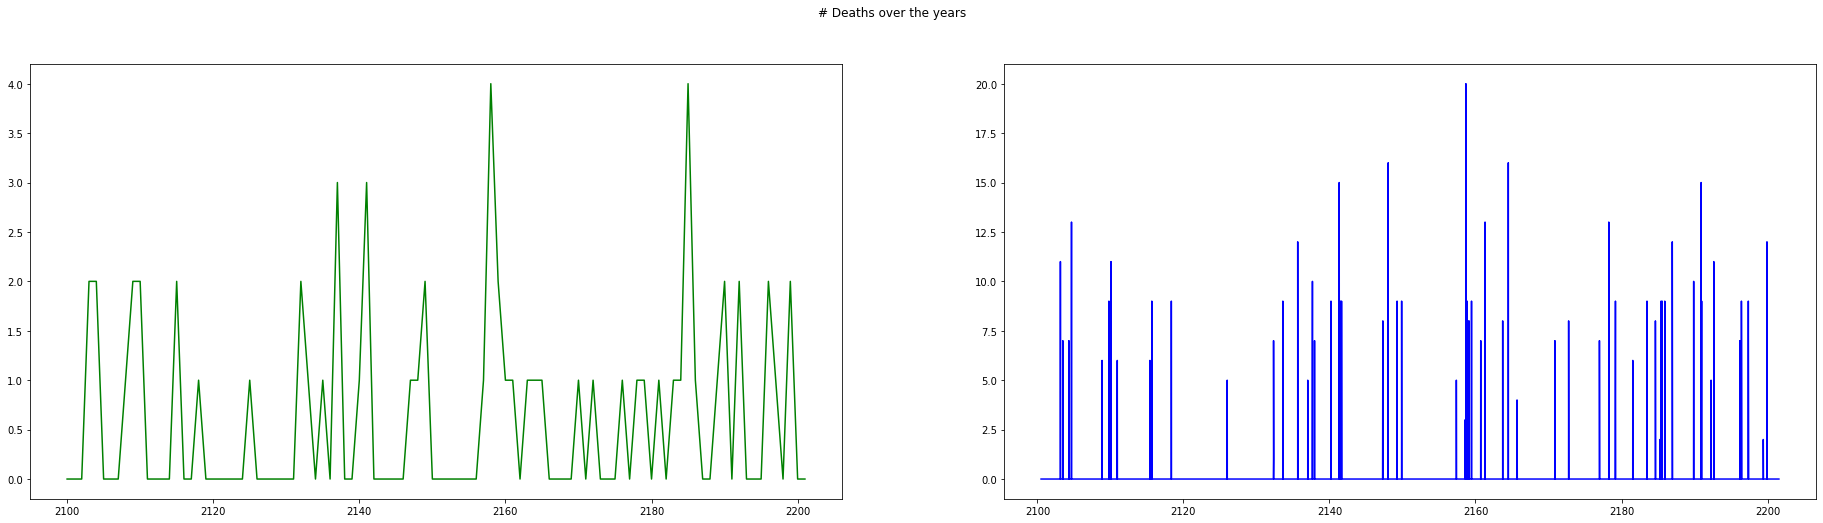

In [ ]:
time_df = nicu_dataset[['ADMITTIME', 'HOSPITAL_EXPIRE_FLAG']]
time_df['ADMITTIME'] = pd.to_datetime(nicu_dataset['ADMITTIME'])
time_df['ADMITTIME'] = time_df['ADMITTIME'].dt.date
time_df['ADMITTIME'] = pd.to_datetime(time_df['ADMITTIME'])
time_df = pd.pivot_table(time_df, values='HOSPITAL_EXPIRE_FLAG',
                   columns=['ADMITTIME'], aggfunc=np.count_nonzero)
time_df = time_df.T
time_df['YEAR'] = time_df.index.year
year_df = pd.pivot_table(time_df, values='HOSPITAL_EXPIRE_FLAG',
                   columns=['YEAR'], aggfunc=np.count_nonzero)
year_df = year_df.T


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 8))
fig.suptitle('# Deaths over the years ')

ax1.plot(year_df.index, year_df.HOSPITAL_EXPIRE_FLAG, 'g-', label='#daily deaths')
ax2.plot(time_df.index, time_df.HOSPITAL_EXPIRE_FLAG, 'b-', label='#yearly deaths')

plt.show()

### Diagnosis

In [ ]:
diagnosis = nicu_dataset[["HOSPITAL_EXPIRE_FLAG", 'DIAGNOSIS']].groupby(by=["DIAGNOSIS"]).sum()
diagnosis = diagnosis[diagnosis['HOSPITAL_EXPIRE_FLAG'] > 1].sort_values(by='HOSPITAL_EXPIRE_FLAG', ascending = False)
diagnosis.head()

,HOSPITAL_EXPIRE_FLAG
DIAGNOSIS,
NEWBORN,528
PRE-MATURITY,11
PREMATURITY,9


In [ ]:
nicu_dataset['DIAGNOSIS'].replace({'PRE-MATURITY': 'PREMATURITY'}, inplace=True)

In [ ]:
nicu_dataset.head()

,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,INTIME,OUTTIME,LOS,SUBJECT_ID,SEQ_NUM,ICD9_CODE
220,F,2124-09-19 00:00:00,NaN,NaN,NaN,0,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,258,1.0,V3000
221,F,2124-09-19 00:00:00,NaN,NaN,NaN,0,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,258,2.0,7742
222,F,2124-09-19 00:00:00,NaN,NaN,NaN,0,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,258,3.0,76518
223,F,2124-09-19 00:00:00,NaN,NaN,NaN,0,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,258,4.0,V053
224,F,2124-09-19 00:00:00,NaN,NaN,NaN,0,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,258,5.0,76528


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


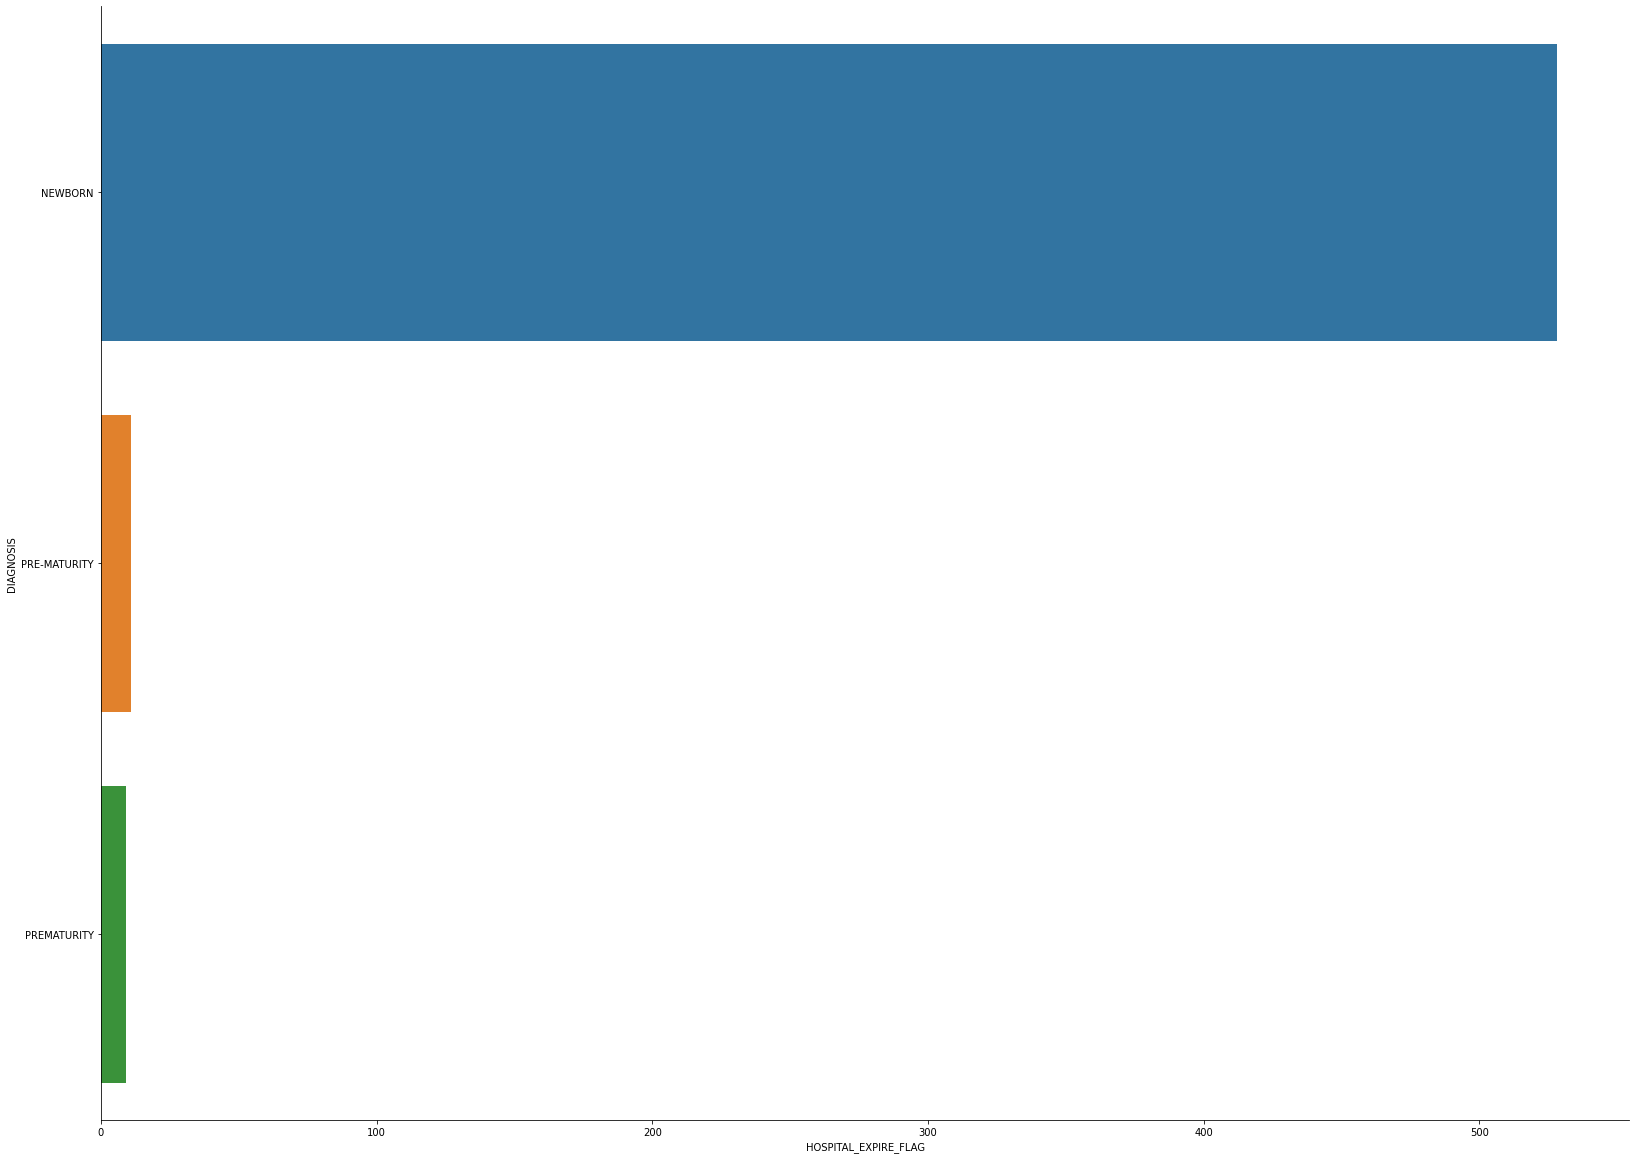

In [ ]:
sns.catplot(ax= ax, data=diagnosis, y=diagnosis.index,  x='HOSPITAL_EXPIRE_FLAG', kind='bar', height=16, aspect=11.7/8.27)

In [ ]:
nicu_dataset.ICD9_CODE.value_counts()

V053     5783
V290     5589
V3000    3537
V3001    2795
7742     2268
         ... 
42742       1
1108        1
7284        1
75531       1
75444       1
Name: ICD9_CODE, Length: 910, dtype: int64

In [ ]:
# diagnosis = nicu_dataset[["HOSPITAL_EXPIRE_FLAG", 'SHORT_TITLE']].groupby(by=["SHORT_TITLE"]).sum()
# short_title = short_title[short_title['HOSPITAL_EXPIRE_FLAG'] > 1].sort_values(by='HOSPITAL_EXPIRE_FLAG', ascending = False)
# short_title.head()

In [ ]:
#sns.catplot(ax= ax, data=short_title, y=short_title.index,  x='HOSPITAL_EXPIRE_FLAG', kind='bar', height=16, aspect=11.7/8.27)


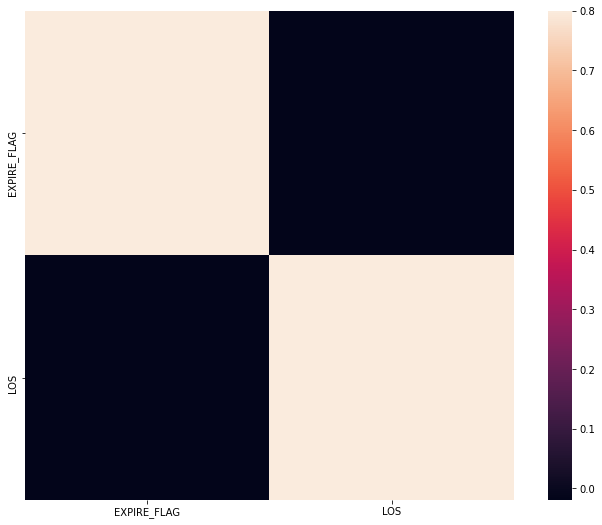

In [ ]:
#correlation matrix
data = nicu_dataset[['EXPIRE_FLAG', 'LOS']]
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

##LOCATION

###ADMISSION LOCATION

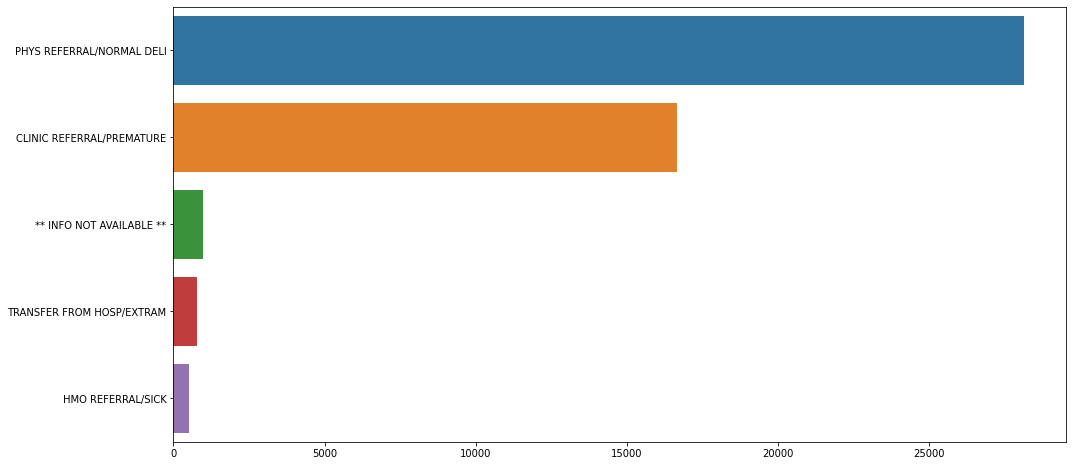

In [ ]:
admission_loc = nicu_dataset["ADMISSION_LOCATION"].value_counts()
fig, ax = plt.subplots(figsize= (16, 8))
sns.barplot(ax = ax, x=admission_loc.values, y=admission_loc.index)

### DISCHARE LOCATION

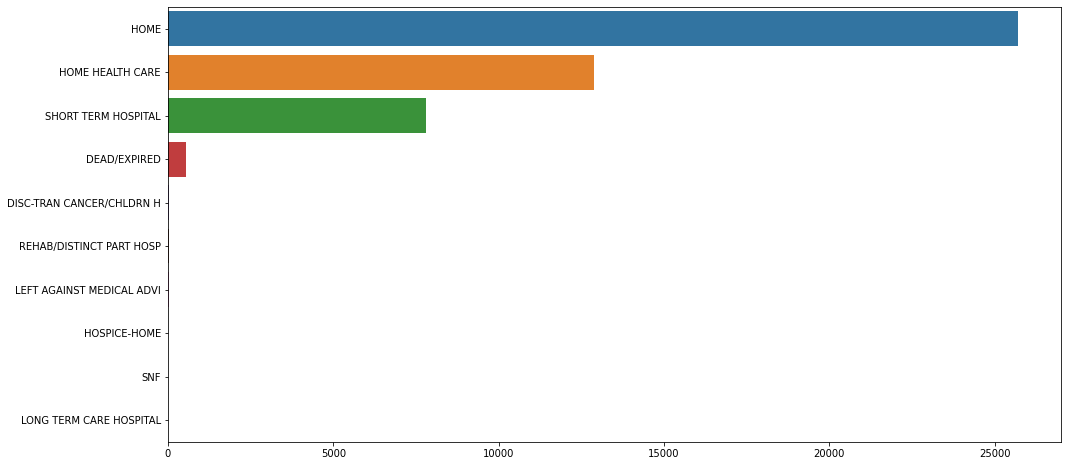

In [ ]:
dis_loc = nicu_dataset["DISCHARGE_LOCATION"].value_counts()
fig, ax = plt.subplots(figsize= (16, 8))
sns.barplot(ax = ax, x=dis_loc.values, y=dis_loc.index)

##NULL VLAUES

In [ ]:
pd.isnull(nicu_dataset.MARITAL_STATUS).values.any()

True

# Feature Engineering

In [ ]:
#dropping unncessary columns after Exploring
nicu_dataset.drop("MARITAL_STATUS", axis = 1, inplace = True)
#nicu_dataset.drop("RELIGION", axis = 1, inplace = True)
#nicu_dataset.drop("LANGUAGE", axis = 1, inplace = True)
nicu_dataset.drop("HAS_CHARTEVENTS_DATA", axis = 1, inplace = True)
#nicu_dataset.drop("ADMISSION_TYPE", axis = 1, inplace = True)
nicu_dataset.drop("EXPIRE_FLAG", axis = 1, inplace = True)
nicu_dataset.drop("SUBJECT_ID", axis = 1, inplace = True)

In [ ]:
#changing date formats
nicu_dataset['ADMITTIME'] = pd.to_datetime(nicu_dataset['ADMITTIME'])
nicu_dataset['DISCHTIME'] = pd.to_datetime(nicu_dataset['DISCHTIME'])
nicu_dataset['DOB'] = pd.to_datetime(nicu_dataset['DOB'])
nicu_dataset['DOD'] = pd.to_datetime(nicu_dataset['DOD'])
nicu_dataset['DOD_HOSP'] = pd.to_datetime(nicu_dataset['DOD_HOSP'])
nicu_dataset['INTIME'] = pd.to_datetime(nicu_dataset['INTIME'])
nicu_dataset['OUTTIME'] = pd.to_datetime(nicu_dataset['OUTTIME'])

In [ ]:
#nicu_dataset.drop("MONTHS", axis = 1, inplace = True)

In [ ]:
nicu_dataset["MONTHS"] = (nicu_dataset.OUTTIME - nicu_dataset.DOB).astype('timedelta64[M]')
nicu_dataset.head()

,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,INTIME,OUTTIME,LOS,SEQ_NUM,ICD9_CODE,MONTHS
220,F,2124-09-19,NaT,NaT,NaN,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,ASIAN,NaN,NaN,NEWBORN,0,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,1.0,V3000,0.0
221,F,2124-09-19,NaT,NaT,NaN,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,ASIAN,NaN,NaN,NEWBORN,0,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,2.0,7742,0.0
222,F,2124-09-19,NaT,NaT,NaN,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,ASIAN,NaN,NaN,NEWBORN,0,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,3.0,76518,0.0
223,F,2124-09-19,NaT,NaT,NaN,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,ASIAN,NaN,NaN,NEWBORN,0,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,4.0,V053,0.0
224,F,2124-09-19,NaT,NaT,NaN,189406,2124-09-19 03:59:00,2124-09-22 15:52:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NaN,NOT SPECIFIED,ASIAN,NaN,NaN,NEWBORN,0,carevue,NICU,NICU,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,5.0,76528,0.0


In [ ]:
# Convert timedelta type into float 'days', 86400 seconds in a day
nicu_dataset['DischargedIn(days)'] = (nicu_dataset['DISCHTIME'] - nicu_dataset['ADMITTIME']).dt.total_seconds()/86400

In [ ]:
nicu_dataset[['HADM_ID', 'INTIME', 'OUTTIME','LOS','ADMITTIME', 'DISCHTIME',  'DischargedIn(days)']].head()

,HADM_ID,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DischargedIn(days)
220,189406,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,2124-09-19 03:59:00,2124-09-22 15:52:00,3.495139
221,189406,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,2124-09-19 03:59:00,2124-09-22 15:52:00,3.495139
222,189406,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,2124-09-19 03:59:00,2124-09-22 15:52:00,3.495139
223,189406,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,2124-09-19 03:59:00,2124-09-22 15:52:00,3.495139
224,189406,2124-09-19 04:05:48,2124-09-20 16:39:08,1.5231,2124-09-19 03:59:00,2124-09-22 15:52:00,3.495139


In [ ]:
#dropping dates
nicu_dataset.drop("DOB", axis = 1, inplace = True)
nicu_dataset.drop("DOD", axis = 1, inplace = True)
nicu_dataset.drop("DOD_HOSP", axis = 1, inplace = True)
nicu_dataset.drop("DOD_SSN", axis = 1, inplace = True)
nicu_dataset.drop("INTIME", axis = 1, inplace = True)
nicu_dataset.drop("OUTTIME", axis = 1, inplace = True)
nicu_dataset.drop("ADMITTIME", axis = 1, inplace = True)
nicu_dataset.drop("DISCHTIME", axis = 1, inplace = True)
nicu_dataset.drop("DEATHTIME", axis = 1, inplace = True)
nicu_dataset.drop("EDREGTIME", axis = 1, inplace = True)
nicu_dataset.drop("EDOUTTIME", axis = 1, inplace = True)
nicu_dataset.drop("LOS", axis = 1, inplace = True)

In [ ]:
nicu_dataset.DBSOURCE.value_counts()

carevue    47066
Name: DBSOURCE, dtype: int64

In [ ]:
nicu_dataset.LANGUAGE.value_counts()

ENGL    858
MAND    254
CAPE    238
PORT    230
CANT    183
PTUN    130
SPAN    126
VIET     59
RUSS     13
Name: LANGUAGE, dtype: int64

In [ ]:
nicu_dataset.drop("LANGUAGE", axis = 1, inplace = True)
nicu_dataset.drop("DBSOURCE", axis = 1, inplace = True)
nicu_dataset.drop("SEQ_NUM", axis = 1, inplace = True)

In [ ]:
nicu_dataset.shape

(47066, 15)

In [ ]:
nicu_dataset.head()

,GENDER,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,FIRST_CAREUNIT,LAST_CAREUNIT,ICD9_CODE,MONTHS,DischargedIn(days)
220,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,V3000,0.0,3.495139
221,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,7742,0.0,3.495139
222,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,76518,0.0,3.495139
223,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,V053,0.0,3.495139
224,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,76528,0.0,3.495139


##ICD9_CODE

### Using code and idea from Source LINK

In [ ]:
# Filter out E and V codes since processing will be done on the numeric first 3 values
nicu_dataset['RECODE'] = nicu_dataset['ICD9_CODE']
nicu_dataset['RECODE'] = nicu_dataset['RECODE'][~nicu_dataset['RECODE'].str.contains("[a-zA-Z]").fillna(False)]
nicu_dataset['RECODE'].fillna(value='999', inplace=True)
nicu_dataset['RECODE'] = nicu_dataset['RECODE'].str.slice(start=0, stop=3, step=1)
nicu_dataset['RECODE'] = nicu_dataset['RECODE'].astype(int)

# ICD-9 Main Category ranges
icd9_ranges = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390),
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]

# Associated category names
diag_dict = {0: 'infectious', 1: 'neoplasms', 2: 'endocrine', 3: 'blood',
             4: 'mental', 5: 'nervous', 6: 'circulatory', 7: 'respiratory',
             8: 'digestive', 9: 'genitourinary', 10: 'pregnancy', 11: 'skin',
             12: 'muscular', 13: 'congenital', 14: 'prenatal', 15: 'misc',
             16: 'injury', 17: 'misc'}

# Re-code in terms of integer
for num, cat_range in enumerate(icd9_ranges):
    nicu_dataset['RECODE'] = np.where(nicu_dataset['RECODE'].between(cat_range[0], cat_range[1]),
                                     num, nicu_dataset['RECODE'])

# Convert integer to category name using diag_dict
nicu_dataset['RECODE'] = nicu_dataset['RECODE']
nicu_dataset['CATEGORY'] = nicu_dataset['RECODE'].replace(diag_dict)

# Verify
print(nicu_dataset.head())

    GENDER  HADM_ID ADMISSION_TYPE  ... DischargedIn(days) RECODE  CATEGORY
220      F   189406        NEWBORN  ...           3.495139     16    injury
221      F   189406        NEWBORN  ...           3.495139     14  prenatal
222      F   189406        NEWBORN  ...           3.495139     14  prenatal
223      F   189406        NEWBORN  ...           3.495139     16    injury
224      F   189406        NEWBORN  ...           3.495139     14  prenatal

[5 rows x 17 columns]


In [ ]:
nicu_dataset.CATEGORY.value_counts()

injury           22519
prenatal         20208
congenital        2356
misc               391
digestive          322
nervous            274
skin               206
circulatory        180
infectious         149
endocrine          130
respiratory        111
neoplasms           62
muscular            49
blood               47
genitourinary       46
mental              16
Name: CATEGORY, dtype: int64

In [ ]:
nicu_dataset.drop('ICD9_CODE', axis=1, inplace=True)

In [ ]:
nicu_dataset.groupby('HADM_ID')['CATEGORY'].apply(list).reset_index()

,HADM_ID,CATEGORY
0,100023,"[injury, congenital, injury, injury, injury]"
1,100025,"[injury, prenatal, injury, prenatal, prenatal,..."
2,100029,"[prenatal, prenatal, injury, prenatal]"
3,100044,"[injury, prenatal, prenatal, prenatal, prenata..."
4,100055,"[injury, prenatal, misc, misc, injury, injury,..."
...,...,...
7987,199913,"[injury, prenatal, prenatal, prenatal, prenata..."
7988,199917,"[injury, prenatal, prenatal, injury]"
7989,199918,"[injury, prenatal, circulatory, prenatal, pren..."
7990,199954,"[injury, injury, injury]"


In [ ]:
nicu_dataset.drop('RECODE', axis=1, inplace=True)


In [ ]:
nicu_dataset.head()

,GENDER,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,FIRST_CAREUNIT,LAST_CAREUNIT,MONTHS,DischargedIn(days),CATEGORY
220,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,0.0,3.495139,injury
221,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,0.0,3.495139,prenatal
222,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,0.0,3.495139,prenatal
223,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,0.0,3.495139,injury
224,F,189406,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,ASIAN,NEWBORN,0,NICU,NICU,0.0,3.495139,prenatal


In [ ]:
testdataset = nicu_dataset.copy()

In [ ]:
testdataset.drop('DIAGNOSIS', axis=1, inplace=True)

In [ ]:
testdataset = testdataset.groupby(['HADM_ID', 'GENDER', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION', 'ETHNICITY','HOSPITAL_EXPIRE_FLAG', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'MONTHS', 'DischargedIn(days)' ])['CATEGORY'].apply(list).reset_index()
testdataset.head()

,HADM_ID,GENDER,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,HOSPITAL_EXPIRE_FLAG,FIRST_CAREUNIT,LAST_CAREUNIT,MONTHS,DischargedIn(days),CATEGORY
0,100023,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CHRISTIAN SCIENTIST,WHITE,0,NICU,NICU,0.0,2.360417,"[injury, congenital, injury, injury, injury]"
1,100025,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,JEWISH,WHITE,0,NICU,NICU,0.0,2.603472,"[injury, prenatal, injury, prenatal, prenatal,..."
2,100029,F,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,NOT SPECIFIED,WHITE,0,NICU,NICU,0.0,15.006944,"[prenatal, prenatal, injury, prenatal]"
3,100044,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Government,NOT SPECIFIED,WHITE,0,NICU,NICU,1.0,32.801389,"[injury, prenatal, prenatal, prenatal, prenata..."
4,100055,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CATHOLIC,WHITE,0,NICU,NICU,0.0,4.227778,"[injury, prenatal, misc, misc, injury, injury,..."


In [ ]:
df_test = testdataset[['HADM_ID', 'CATEGORY']]
df_test

,HADM_ID,CATEGORY
0,100023,"[injury, congenital, injury, injury, injury]"
1,100025,"[injury, prenatal, injury, prenatal, prenatal,..."
2,100029,"[prenatal, prenatal, injury, prenatal]"
3,100044,"[injury, prenatal, prenatal, prenatal, prenata..."
4,100055,"[injury, prenatal, misc, misc, injury, injury,..."
...,...,...
7971,199913,"[injury, prenatal, prenatal, prenatal, prenata..."
7972,199917,"[injury, prenatal, prenatal, injury]"
7973,199918,"[injury, prenatal, circulatory, prenatal, pren..."
7974,199954,"[injury, injury, injury]"


In [ ]:
testdataset.shape

(7976, 14)

In [ ]:
cat = pd.get_dummies(testdataset['CATEGORY'].apply(pd.Series).stack()).sum(level=0)
cat = cat.join(testdataset.HADM_ID, how='outer')
cat

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,prenatal,respiratory,skin,HADM_ID
0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,100023
1,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,100025
2,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,100029
3,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0,100044
4,0,0,0,0,0,0,0,6,0,4,0,0,0,2,0,0,100055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,0,0,0,0,0,0,0,3,0,0,0,0,0,7,0,0,199913
7972,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,199917
7973,0,1,1,0,0,0,0,1,0,0,0,0,0,6,0,0,199918
7974,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,199954


In [ ]:
testdataset = testdataset.merge(cat, on ='HADM_ID', how='inner')
testdataset.drop('HADM_ID', axis=1, inplace=True)
testdataset.drop('CATEGORY', axis=1, inplace=True)
testdataset.drop('FIRST_CAREUNIT', axis=1, inplace=True)
testdataset.drop('LAST_CAREUNIT', axis=1, inplace=True)
testdataset.head()

,GENDER,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,HOSPITAL_EXPIRE_FLAG,MONTHS,DischargedIn(days),blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,prenatal,respiratory,skin
0,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CHRISTIAN SCIENTIST,WHITE,0,0.0,2.360417,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0
1,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,JEWISH,WHITE,0,0.0,2.603472,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0
2,F,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,NOT SPECIFIED,WHITE,0,0.0,15.006944,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0
3,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Government,NOT SPECIFIED,WHITE,0,1.0,32.801389,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0
4,M,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CATHOLIC,WHITE,0,0.0,4.227778,0,0,0,0,0,0,0,6,0,4,0,0,0,2,0,0


## DUMMY CODING OF CATEGORICAL FEATURES

In [ ]:
testdataset = pd.get_dummies(testdataset, columns=['ADMISSION_TYPE'])

In [ ]:
set_diagnosis = nicu_dataset.groupby('DIAGNOSIS').size()
set_diagnosis

DIAGNOSIS
BILIRUBINEMIA                               1
BILRUBINEMIA                                6
DECREASE TEMPERATURE;HYPERBILIRUBINEMIA     3
DUSKY SPELLS                                4
ELEVATED BILIRUBIN                          3
                                           ..
S/P SHUNT                                   9
S/P TRACHEA                                 7
SEIZURES                                   16
SEPSIS                                      8
TRACH PLACEMENT                             8
Length: 61, dtype: int64

In [ ]:
testdataset.head()

,GENDER,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,HOSPITAL_EXPIRE_FLAG,MONTHS,DischargedIn(days),blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,prenatal,respiratory,skin,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT
0,M,PHYS REFERRAL/NORMAL DELI,HOME,Private,CHRISTIAN SCIENTIST,WHITE,0,0.0,2.360417,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0
1,M,PHYS REFERRAL/NORMAL DELI,HOME,Private,JEWISH,WHITE,0,0.0,2.603472,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,1,0
2,F,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,NOT SPECIFIED,WHITE,0,0.0,15.006944,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0
3,M,PHYS REFERRAL/NORMAL DELI,HOME,Government,NOT SPECIFIED,WHITE,0,1.0,32.801389,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0,0,0,1,0
4,M,PHYS REFERRAL/NORMAL DELI,HOME,Private,CATHOLIC,WHITE,0,0.0,4.227778,0,0,0,0,0,0,0,6,0,4,0,0,0,2,0,0,0,0,1,0


In [ ]:
testdataset.drop('DISCHARGE_LOCATION', axis=1, inplace=True)

In [ ]:
testdataset = pd.get_dummies(testdataset, columns=['GENDER', 'INSURANCE', 'ADMISSION_LOCATION' ])

In [ ]:
testdataset.drop('GENDER_M', axis=1, inplace=True)
testdataset

,RELIGION,ETHNICITY,HOSPITAL_EXPIRE_FLAG,MONTHS,DischargedIn(days),blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,prenatal,respiratory,skin,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,GENDER_F,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM
0,CHRISTIAN SCIENTIST,WHITE,0,0.0,2.360417,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,JEWISH,WHITE,0,0.0,2.603472,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,NOT SPECIFIED,WHITE,0,0.0,15.006944,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3,NOT SPECIFIED,WHITE,0,1.0,32.801389,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,CATHOLIC,WHITE,0,0.0,4.227778,0,0,0,0,0,0,0,6,0,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,CATHOLIC,HISPANIC OR LATINO,0,0.0,24.125694,0,0,0,0,0,0,0,3,0,0,0,0,0,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
7972,CATHOLIC,HISPANIC OR LATINO,0,0.0,9.472222,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
7973,CATHOLIC,WHITE,0,1.0,51.818750,0,1,1,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
7974,NOT SPECIFIED,WHITE,0,0.0,2.084722,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


## Religion

In [ ]:
print(testdataset.RELIGION.unique())
testdataset['RELIGION'].loc[~testdataset['RELIGION'].isin(['NOT SPECIFIED', 'UNOBTAINABLE'])] = 'RELIGIOUS'
testdataset.RELIGION.unique()

['CHRISTIAN SCIENTIST' 'JEWISH' 'NOT SPECIFIED' 'CATHOLIC' 'UNOBTAINABLE'
 'PROTESTANT QUAKER' 'OTHER' 'BUDDHIST' 'HINDU' 'EPISCOPALIAN' 'MUSLIM'
 'GREEK ORTHODOX' 'UNITARIAN-UNIVERSALIST' 'ROMANIAN EAST. ORTH'
 "JEHOVAH'S WITNESS" '7TH DAY ADVENTIST']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array(['RELIGIOUS', 'NOT SPECIFIED', 'UNOBTAINABLE'], dtype=object)

In [ ]:
testdataset = pd.get_dummies(testdataset, columns=['RELIGION'])
testdataset

,ETHNICITY,HOSPITAL_EXPIRE_FLAG,MONTHS,DischargedIn(days),blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,prenatal,respiratory,skin,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,GENDER_F,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,RELIGION_NOT SPECIFIED,RELIGION_RELIGIOUS,RELIGION_UNOBTAINABLE
0,WHITE,0,0.0,2.360417,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,WHITE,0,0.0,2.603472,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,WHITE,0,0.0,15.006944,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,WHITE,0,1.0,32.801389,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,WHITE,0,0.0,4.227778,0,0,0,0,0,0,0,6,0,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,HISPANIC OR LATINO,0,0.0,24.125694,0,0,0,0,0,0,0,3,0,0,0,0,0,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7972,HISPANIC OR LATINO,0,0.0,9.472222,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
7973,WHITE,0,1.0,51.818750,0,1,1,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7974,WHITE,0,0.0,2.084722,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


## Ethnicity

In [ ]:
# Compress the number of ethnicity categories
testdataset['ETHNICITY'].replace(regex=r'^ASIAN\D*', value='ASIAN', inplace=True)
testdataset['ETHNICITY'].replace(regex=r'^WHITE\D*', value='WHITE', inplace=True)
testdataset['ETHNICITY'].replace(regex=r'^HISPANIC\D*', value='HISPANIC/LATINO', inplace=True)
testdataset['ETHNICITY'].replace(regex=r'^BLACK\D*', value='BLACK/AFRICAN AMERICAN', inplace=True)
testdataset['ETHNICITY'].replace(['UNABLE TO OBTAIN', 'OTHER', 'PATIENT DECLINED TO ANSWER', 
                         'UNKNOWN/NOT SPECIFIED'], value='OTHER/UNKNOWN', inplace=True)
testdataset['ETHNICITY'].loc[~testdataset['ETHNICITY'].isin(testdataset['ETHNICITY'].value_counts().nlargest(5).index.tolist())] = 'OTHER/UNKNOWN'
testdataset['ETHNICITY'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


WHITE                     4839
OTHER/UNKNOWN             1065
BLACK/AFRICAN AMERICAN     905
ASIAN                      781
HISPANIC/LATINO            386
Name: ETHNICITY, dtype: int64

In [ ]:
testdataset = pd.get_dummies(testdataset, columns=['ETHNICITY'])
testdataset

,HOSPITAL_EXPIRE_FLAG,MONTHS,DischargedIn(days),blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,prenatal,respiratory,skin,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,GENDER_F,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,RELIGION_NOT SPECIFIED,RELIGION_RELIGIOUS,RELIGION_UNOBTAINABLE,ETHNICITY_ASIAN,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_HISPANIC/LATINO,ETHNICITY_OTHER/UNKNOWN,ETHNICITY_WHITE
0,0,0.0,2.360417,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0.0,2.603472,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0.0,15.006944,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,1.0,32.801389,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0,0.0,4.227778,0,0,0,0,0,0,0,6,0,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,0,0.0,24.125694,0,0,0,0,0,0,0,3,0,0,0,0,0,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
7972,0,0.0,9.472222,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
7973,0,1.0,51.818750,0,1,1,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7974,0,0.0,2.084722,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1


#Findings

In [ ]:
global df_result
df_result = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1-score', 'auc'])
df_result

,Model,Accuracy,Precision,Recall,f1-score,auc


In [ ]:
def testingDifferentClassificationModels(model, modelname):
  y_pred = model.predict(X_test)
  print(y_pred)
  print('-------------------------------------------------------------------------------------------------------------------')
  print(metrics.classification_report(y_test, y_pred))

  plot_confusion_matrix(model, X_test, y_test)  
  plt.show()
  gettingPrecisionRecallDifferentModels(model,y_pred, modelname )


In [ ]:
def gettingPrecisionRecallDifferentModels(classifier, y_score, modelname):
  average_precision = average_precision_score(y_test, y_score)
  print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
  disp = plot_precision_recall_curve(classifier, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
  plottingAUCcurve(y_score, modelname)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
def plottingAUCcurve(y_score, modelname):
  global df_result
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  print("ROC",roc_auc)
  accuracy = accuracy_score(y_test, y_score)
  #adding to the result
  report = metrics.classification_report(y_test, y_score, output_dict=True)
  data = pd.DataFrame({"Model": modelname,
                       'Accuracy':accuracy,
                       'Precision': report['1']['precision'],
                       'Recall':report['1']['recall'],
                       'f1-score':report['1']['f1-score'],
                       'auc': roc_auc
                       }, index=[0])
  df_result = df_result.append(data, ignore_index=True)

  plt.figure(figsize=(10,10))
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

# New Section

#Modeling

In [ ]:
target = testdataset['HOSPITAL_EXPIRE_FLAG']
features = testdataset.drop(columns=['HOSPITAL_EXPIRE_FLAG'])

In [ ]:
print(target.shape)
print(features.shape)

(7976,)
(7976, 41)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = .25, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5982 samples.
Testing set has 1994 samples.


In [ ]:
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import graphviz 
from IPython.display import SVG

In [ ]:
def defineDecisionTreeModel(decision_model, modelname):
  print('-------------------------------------------------------------------------------------------------------------------')
  print( decision_model)
  #print( decision_model.feature_importances_)
  dot_data = tree.export_graphviz(decision_model, out_file= None,
                            feature_names = features.columns,
                            class_names= ["0", "1"],
                            filled= True,
                            rounded= True)
  #print(dot_data)
  graph = graphviz.Source(dot_data)
  display(SVG(graph.pipe(format='svg')))
  testingDifferentClassificationModels(decision_model, modelname)
  print('-------------------------------------------------------------------------------------------------------------------')

In [ ]:
from sklearn.model_selection import GridSearchCV
def decisionTreeOptimisation():
  tuned_parameters = {'ccp_alpha': [0.001,0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] ,
              'criterion': ['entropy', 'gini'],
              'splitter': ['best', 'random'],
              'max_depth': range(4,18,2),
              'min_weight_fraction_leaf': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4 , 0.5],
              'max_features':['auto', 'sqrt', 'log2']
                   }

  decision_model = DecisionTreeClassifier(random_state=2)
  DT= GridSearchCV(decision_model, tuned_parameters,cv=kfolds)
  DT.fit(X_train,y_train)
  print(DT.best_params_)
  accuracies = cross_val_score(DT, X_train, y_train, cv=kfolds)
  print('-------------------------------------------------------------------------------------------------------------------')
  print(f"Accuracy: {accuracies.mean()}")
  gettingPrecisionRecallDifferentModels(DT, 'Decision Tree')


In [ ]:
#decisionTreeOptimisation()

-------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


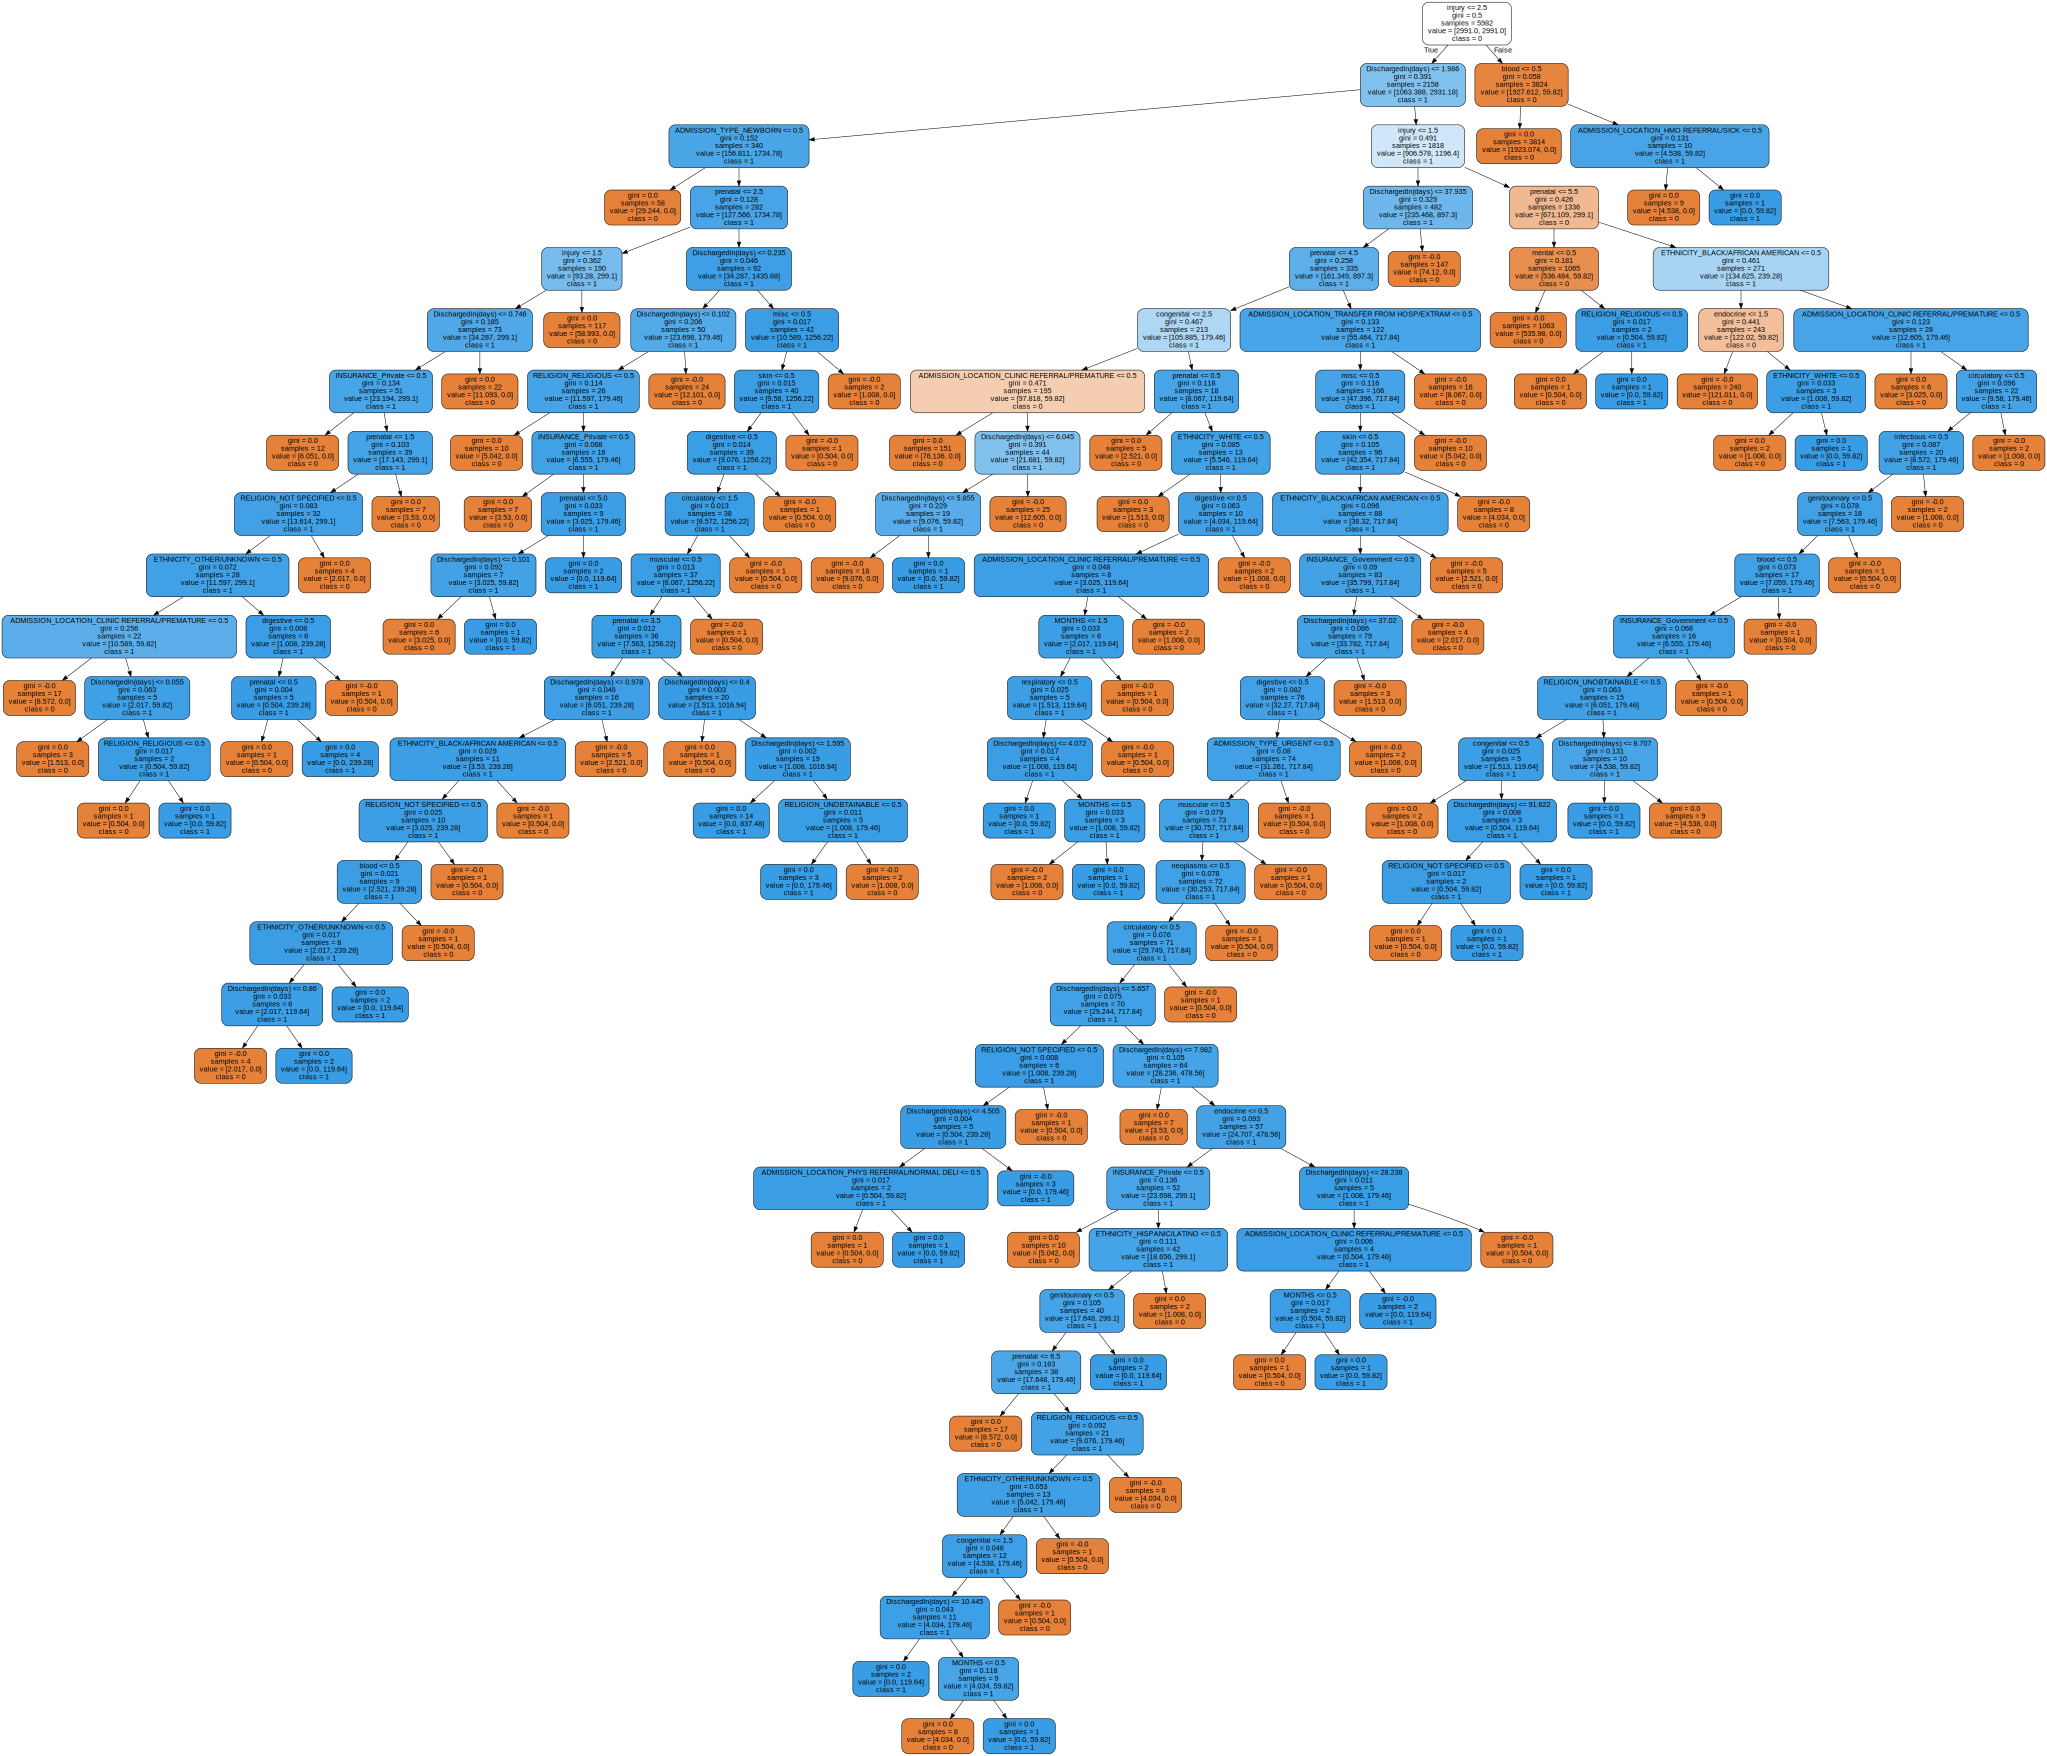

[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.22      0.15      0.18        13

    accuracy                           0.99      1994
   macro avg       0.61      0.58      0.59      1994
weighted avg       0.99      0.99      0.99      1994



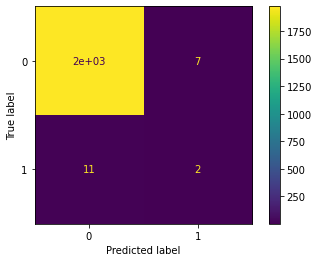

Average precision-recall score: 0.04
ROC 0.57515629247078


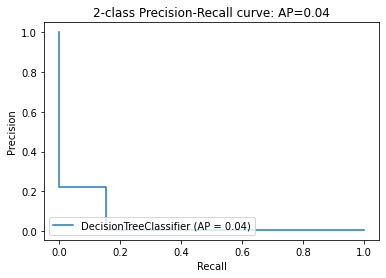

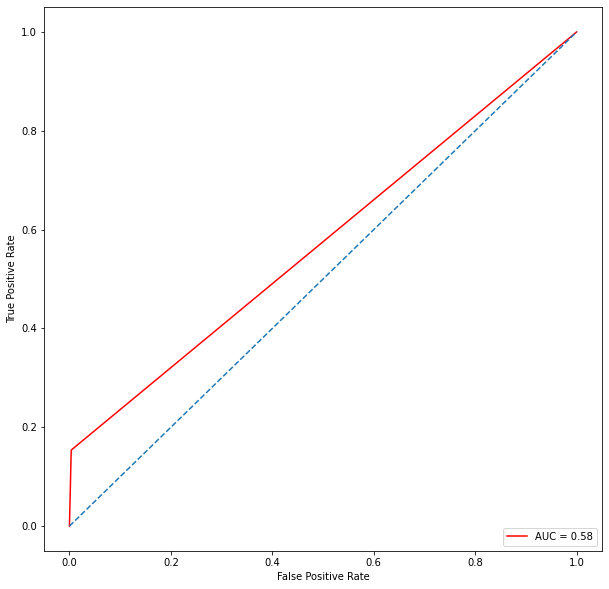

-------------------------------------------------------------------------------------------------------------------


In [ ]:
base_decision_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
base_decision_model.fit(X_train,y_train)
defineDecisionTreeModel(base_decision_model, 'Basic DT')

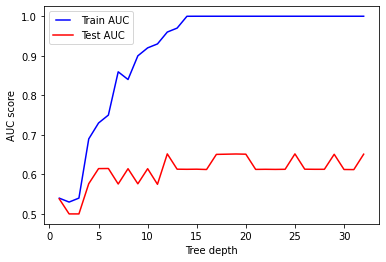

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

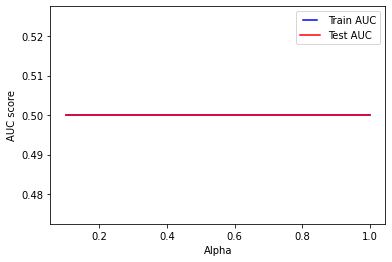

In [ ]:
ccp_alpha = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for c in ccp_alpha:
   dt = DecisionTreeClassifier(ccp_alpha=c)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ccp_alpha, train_results, 'b', label='Train AUC')
line2, = plt.plot(ccp_alpha, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Alpha')
plt.show()

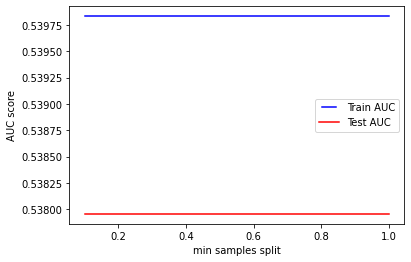

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

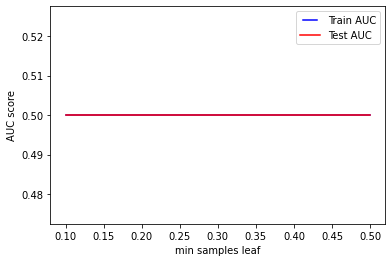

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

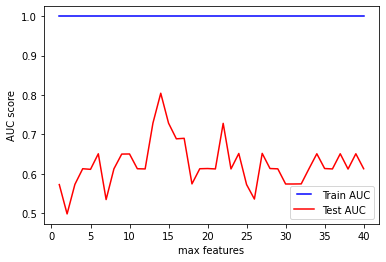

In [ ]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

-------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=9, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


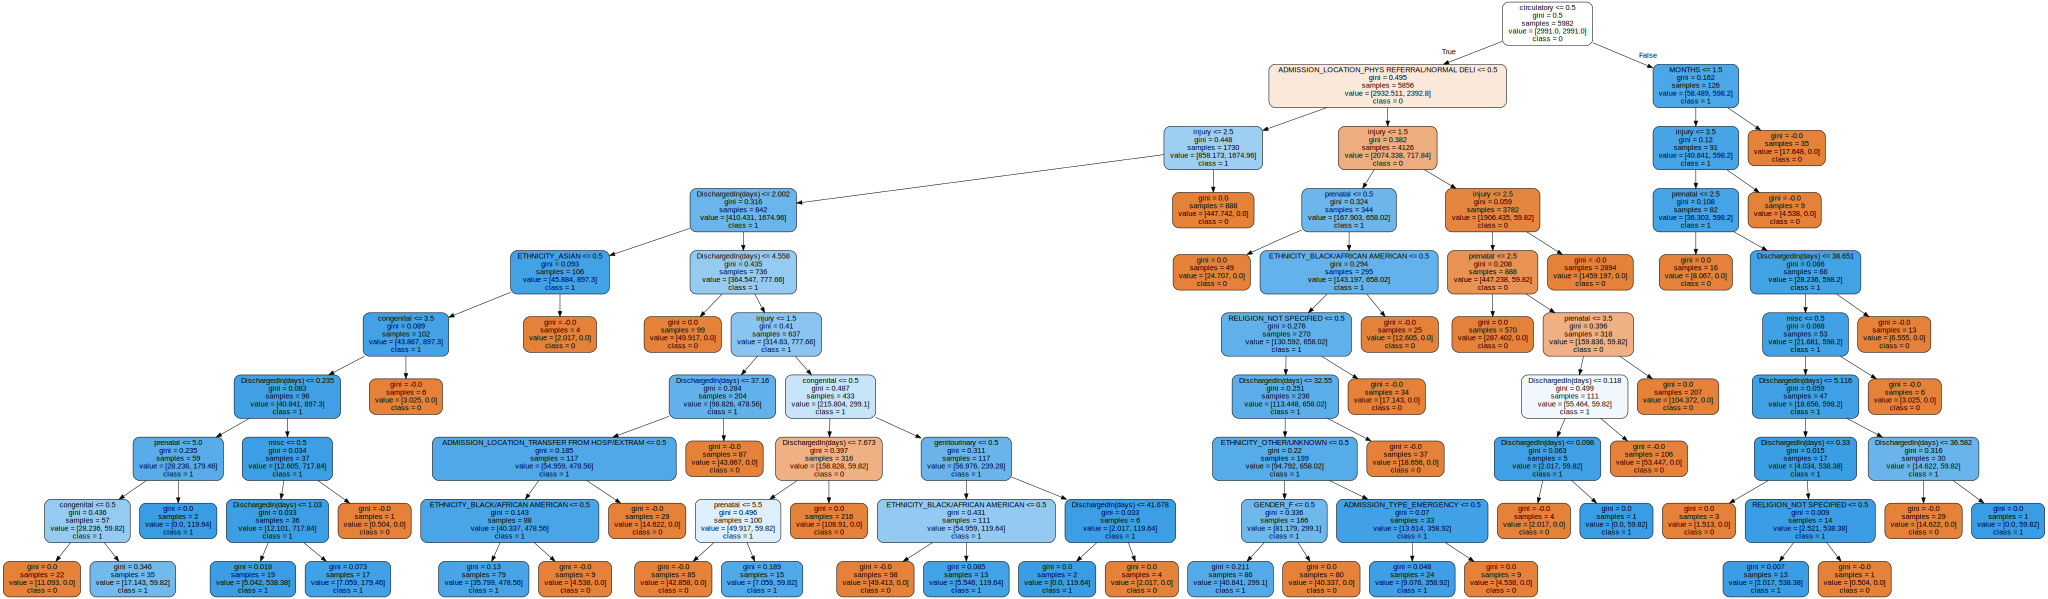

[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1981
           1       0.09      0.62      0.15        13

    accuracy                           0.96      1994
   macro avg       0.54      0.79      0.57      1994
weighted avg       0.99      0.96      0.97      1994



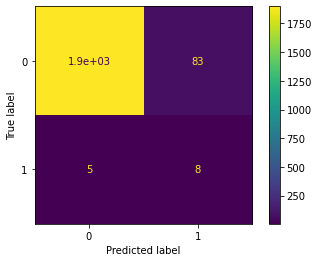

Average precision-recall score: 0.06
ROC 0.7867432920436453


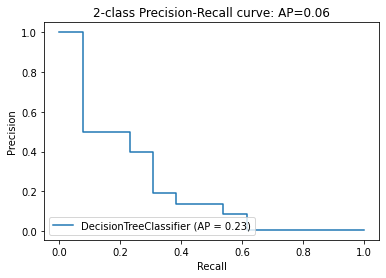

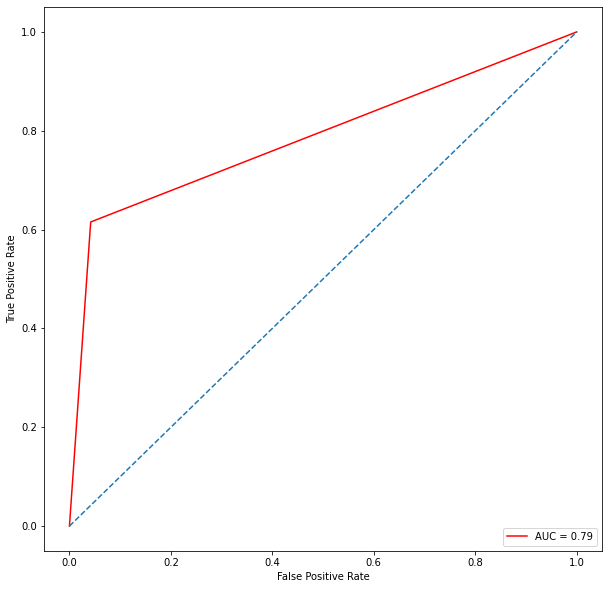

-------------------------------------------------------------------------------------------------------------------


In [ ]:
decision_model_gini = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=9, max_features=15, class_weight='balanced')
decision_model_gini.fit(X_train,y_train)
defineDecisionTreeModel(decision_model_gini, 'Optimised DT with Gini')

-------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')


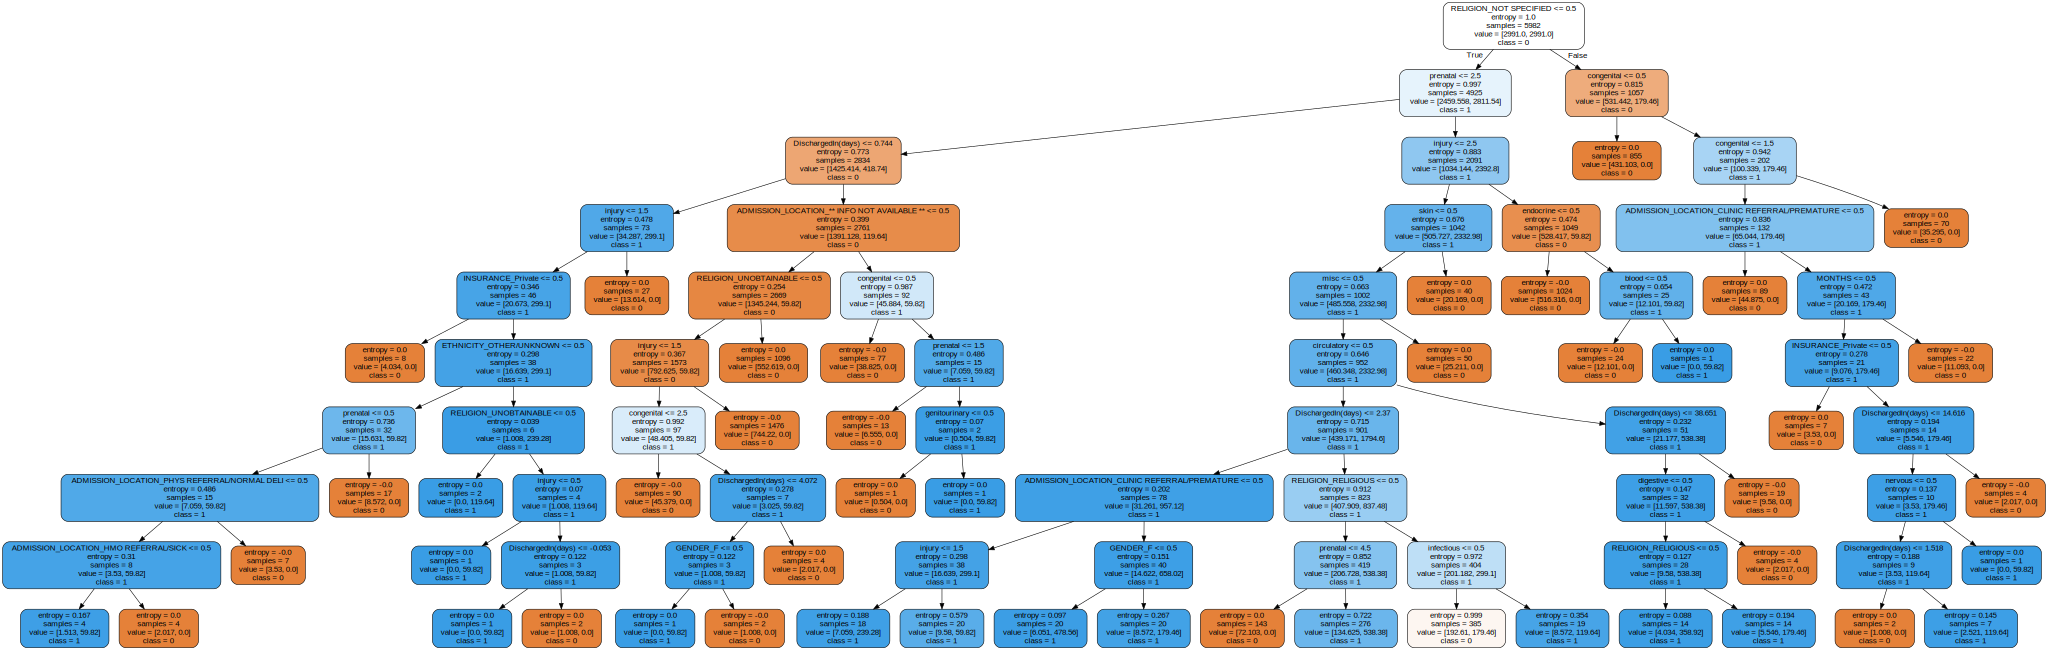

[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1981
           1       0.07      0.69      0.13        13

    accuracy                           0.94      1994
   macro avg       0.53      0.82      0.55      1994
weighted avg       0.99      0.94      0.96      1994



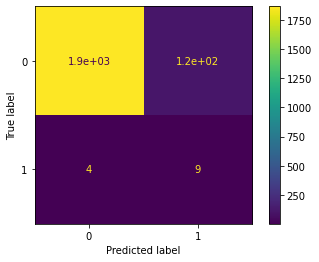

Average precision-recall score: 0.05
ROC 0.8168757038014989


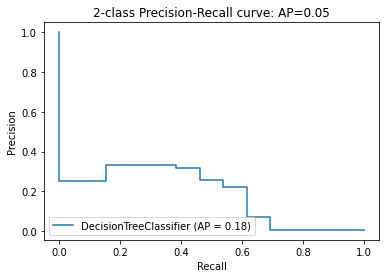

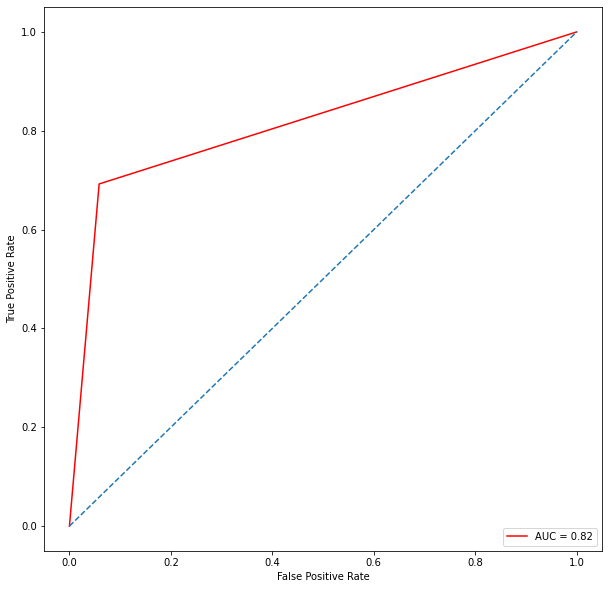

-------------------------------------------------------------------------------------------------------------------


In [ ]:
decision_model_entropy = DecisionTreeClassifier(random_state=42, criterion= 'entropy', max_depth=9, max_features=10, class_weight='balanced')
decision_model_entropy.fit(X_train,y_train)
defineDecisionTreeModel(decision_model_entropy, 'Optimised DT with Entropy')

##LOGISTIC REGRESION

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# LR_model= LogisticRegression(random_state=42)
# #np.linspace(0.1, 0.5, 5, endpoint=True)
# lr_tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
#               'max_iter': [5000],
#               'n_jobs':[10],
#               'l1_ratio': np.linspace(0.1, 1.0, 10, endpoint=True)
#                    }
# LR= GridSearchCV(LR_model, lr_tuned_parameters,cv=kfolds)
# LR.fit(X_train,y_train)
# print(LR.best_params_)

In [ ]:
#print(LR)

In [ ]:

# LR_y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
# LR_y_pred = np.where(LR_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# LR.score(X_test, LR_y_pred)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1378 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1905 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   18.3s finished
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

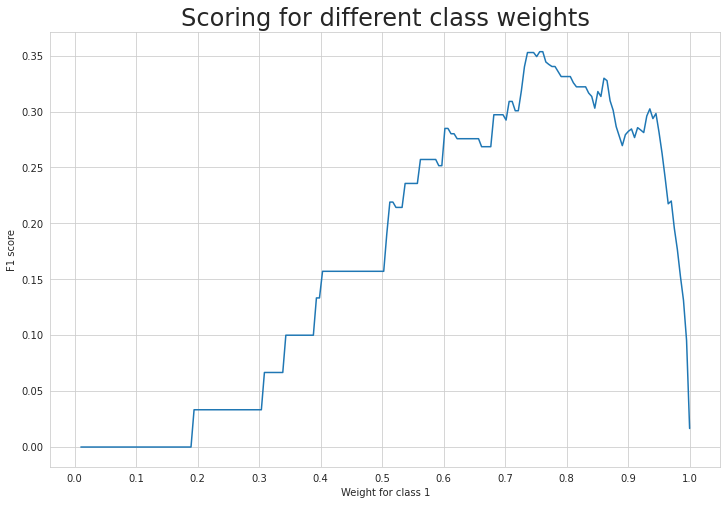

In [ ]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=kfolds, 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
LR_model= LogisticRegression(C=1, max_iter= 5000, penalty='l2', class_weight={0: 0.01, 1: 0.99}, solver='newton-cg')
LR_model.fit(X_train,y_train)
LR_y_prob = LR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
LR_y_pred = np.where(LR_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.



[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      1981
           1       0.07      1.00      0.13        13

    accuracy                           0.91      1994
   macro avg       0.54      0.96      0.54      1994
weighted avg       0.99      0.91      0.95      1994



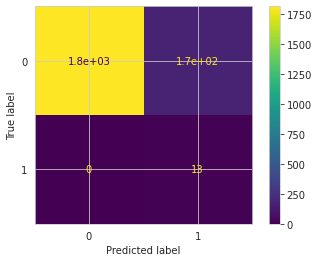

Average precision-recall score: 0.07
ROC 0.9570923775870772


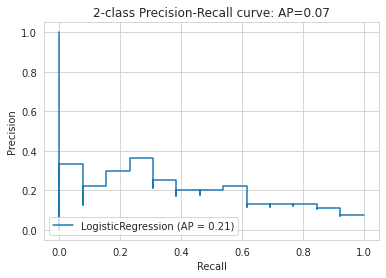

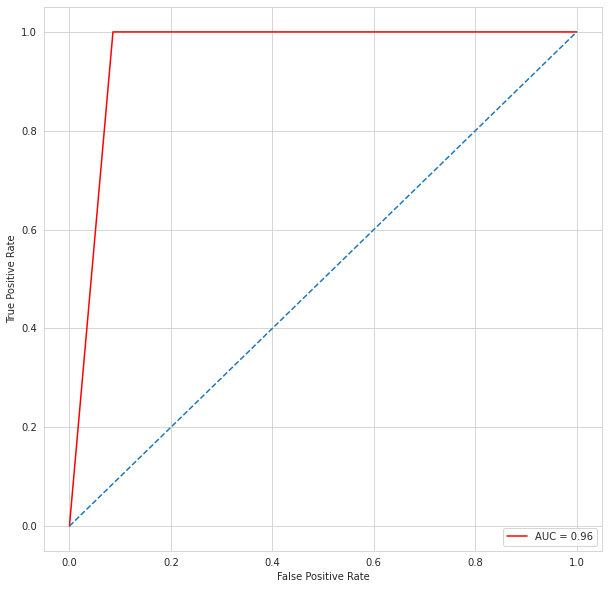

In [ ]:
testingDifferentClassificationModels(LR_model, 'Logistic Regression')

In [ ]:
LR_auc_roc=metrics.classification_report(y_test,LR_y_pred)
print(LR_auc_roc)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96      1981
           1       0.07      1.00      0.13        13

    accuracy                           0.91      1994
   macro avg       0.54      0.96      0.54      1994
weighted avg       0.99      0.91      0.95      1994



In [ ]:
LR_FPR, LR_TPR, thresholds = roc_curve(y_test, LR_y_pred)
LR_roc_auc = auc(LR_FPR, LR_TPR)
print(LR_roc_auc)

0.9570923775870772


Text(0.5, 0, 'False Positive Rate')

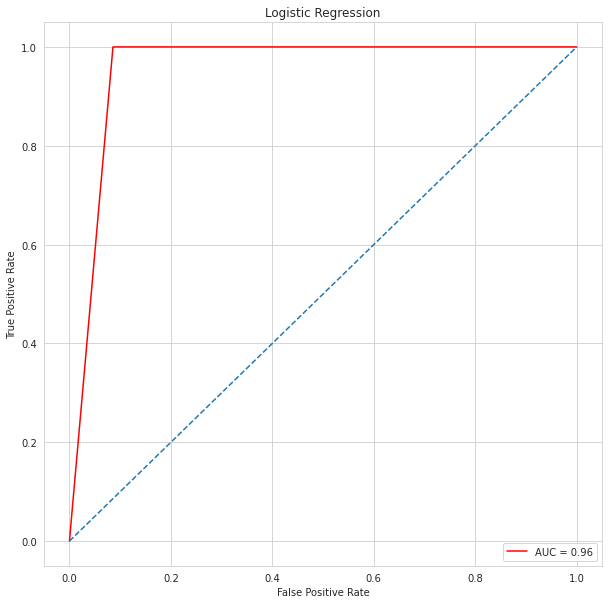

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Logistic Regression')
plt.plot(LR_FPR,LR_TPR, color='red',label = 'AUC = %0.2f' % LR_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Logistic: f1=0.133
Logistic: Precision: [0.07103825 1.        ] Recall: [1. 0.]


Text(0.5, 1.0, '2-class Precision-Recall curve ')

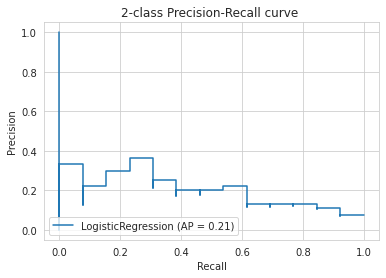

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, LR_y_pred)
lr_f1 = f1_score(y_test, LR_y_pred)

# summarize scores
print('Logistic: f1=%.3f' % (lr_f1))
print(f'Logistic: Precision: {precision} Recall: {recall}')
# plot the precision-recall curves
disp = plot_precision_recall_curve(LR_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ')

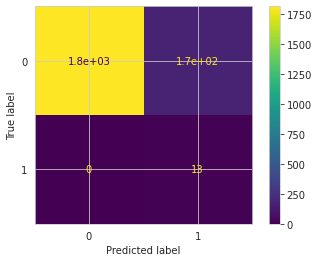

In [ ]:
plot_confusion_matrix(LR_model, X_test, y_test)  
plt.show()

In [ ]:
report = metrics.classification_report(y_test, LR_y_pred, output_dict=True)
print(report['1'])

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1786 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.3s finished
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

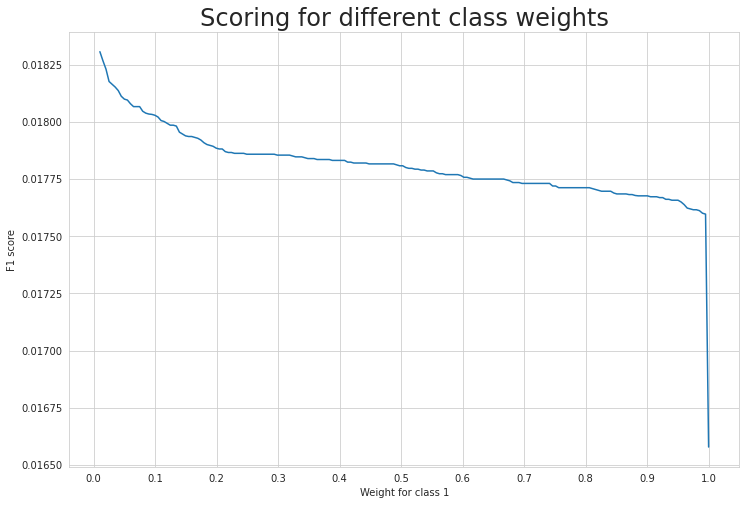

In [ ]:
gaussian = GaussianNB()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'priors': [[x,1.0-x] for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= gaussian, 
                          param_grid= param_grid,
                          cv=kfolds, 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

[0 1 1 ... 1 1 1]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.13      0.23      1981
           1       0.01      1.00      0.01        13

    accuracy                           0.14      1994
   macro avg       0.50      0.57      0.12      1994
weighted avg       0.99      0.14      0.23      1994



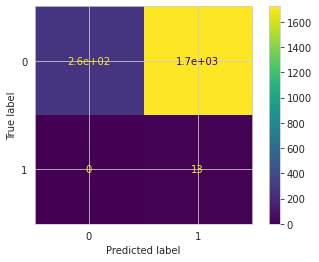

Average precision-recall score: 0.01
ROC 0.5651186269560828


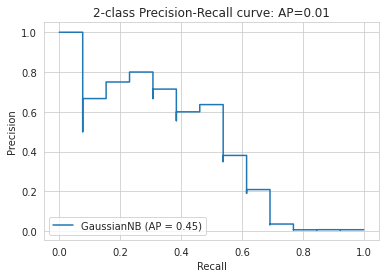

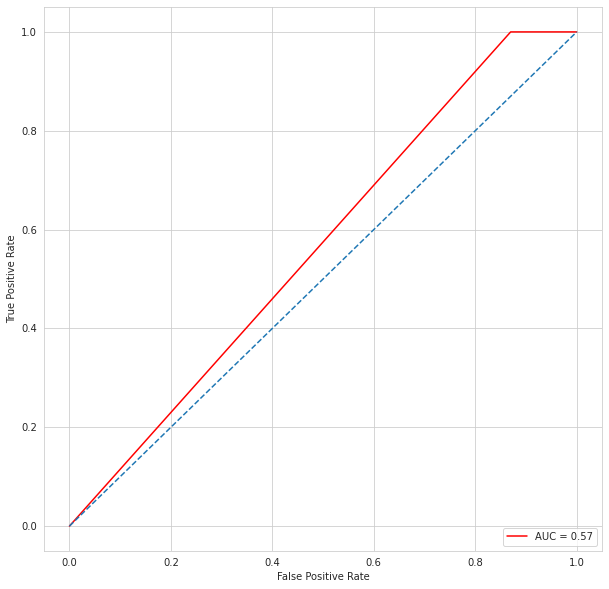

[0.5 0.5]
[5932.   50.]


In [ ]:
gaussian = GaussianNB([0.5, 0.5], var_smoothing=10.0)
gaussian.fit(X_train, y_train)
testingDifferentClassificationModels(gaussian, 'Gaussian NB')
print(gaussian.class_prior_)
print(gaussian.class_count_)

## Random Forest

[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1981
           1       0.18      0.85      0.30        13

    accuracy                           0.97      1994
   macro avg       0.59      0.91      0.64      1994
weighted avg       0.99      0.97      0.98      1994



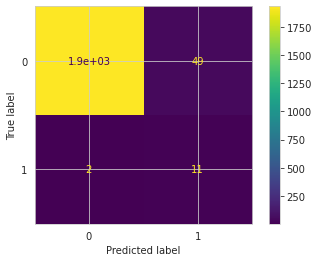

Average precision-recall score: 0.16
ROC 0.9107094319108455


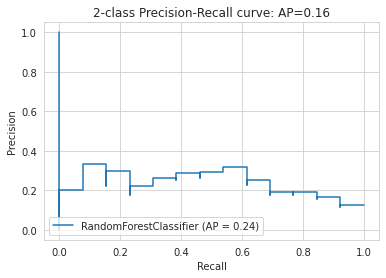

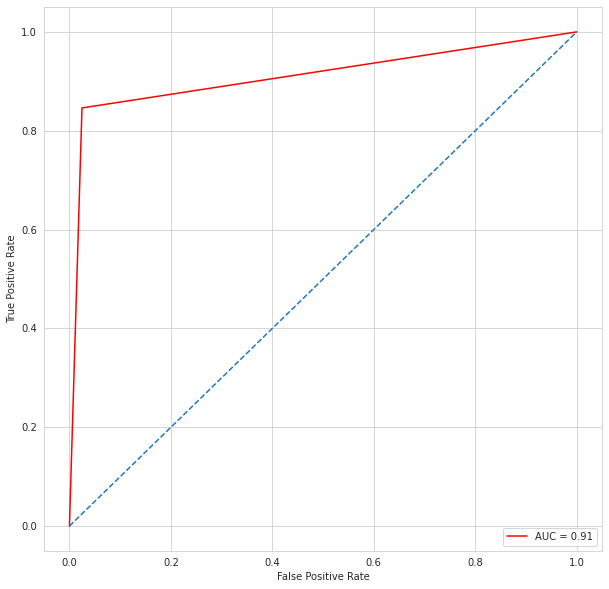

balanced


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42, class_weight='balanced', criterion='entropy', max_depth=6, max_features=10 )
#{0:0.05, 1:0.95}
random_forest.fit(X_train, y_train)
testingDifferentClassificationModels(random_forest, 'Random Forest')
print(random_forest.class_weight)

## Gradient Boosting

[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.62      0.38      0.48        13

    accuracy                           0.99      1994
   macro avg       0.81      0.69      0.74      1994
weighted avg       0.99      0.99      0.99      1994



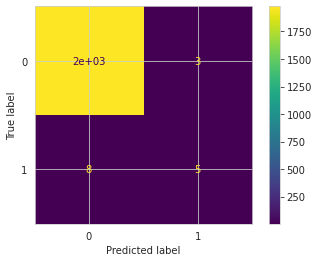

Average precision-recall score: 0.24
ROC 0.6915504989709936


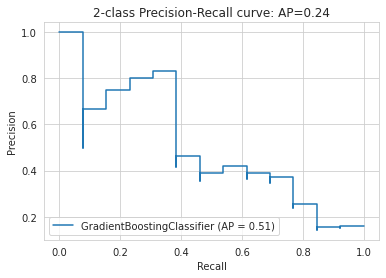

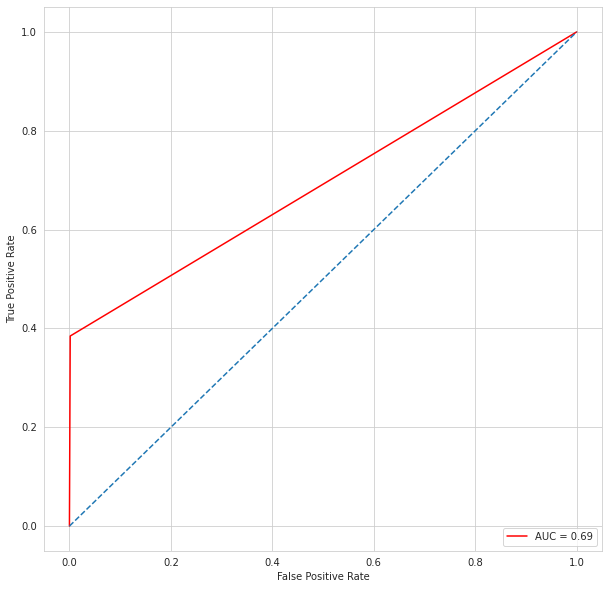

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
testingDifferentClassificationModels(gradient_boosting, 'Gradient Boosting')

##KNN

[0 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.75      0.23      0.35        13

    accuracy                           0.99      1994
   macro avg       0.87      0.62      0.68      1994
weighted avg       0.99      0.99      0.99      1994



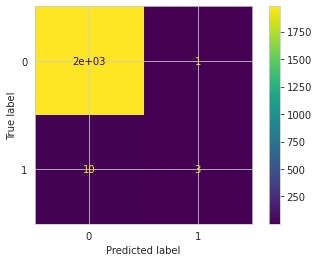

Average precision-recall score: 0.18
ROC 0.6151322176057159


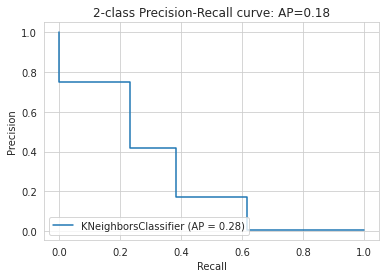

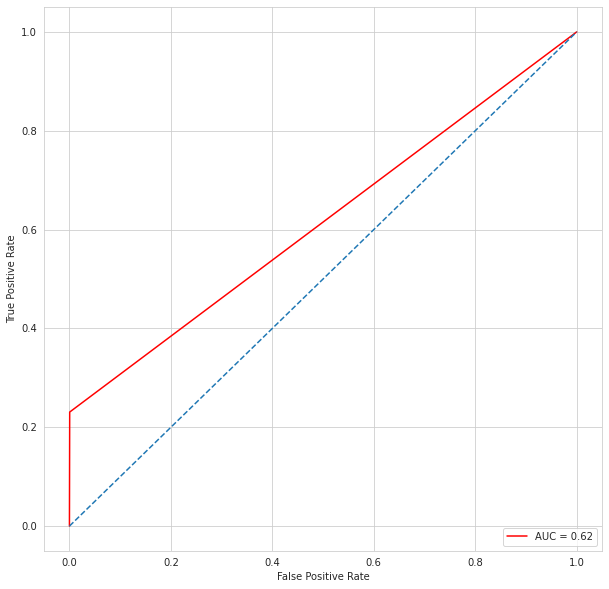

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, p = 2, leaf_size=1)
knn_clf.fit(X_train, y_train)
testingDifferentClassificationModels(knn_clf, 'KNN Classifier')

In [ ]:
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=kfolds)
# #Fit the model
# best_model = clf.fit(X_train,y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


# Result

In [ ]:
classifiers = [LR_model, 
               gaussian, 
               knn_clf, 
               random_forest,
               gradient_boosting,
               decision_model_entropy
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0005047955577990914, 0.001009591115598...","[0.0, 0.0, 0.0, 0.07692307692307693, 0.0769230...",0.977828
GaussianNB,"[0.0, 0.0, 0.0005047955577990914, 0.0005047955...","[0.0, 0.07692307692307693, 0.07692307692307693...",0.802819
KNeighborsClassifier,"[0.0, 0.0005047955577990914, 0.003533568904593...","[0.0, 0.23076923076923078, 0.38461538461538464...",0.800858
RandomForestClassifier,"[0.0, 0.0005047955577990914, 0.002019182231196...","[0.0, 0.0, 0.0, 0.15384615384615385, 0.1538461...",0.986099
GradientBoostingClassifier,"[0.0, 0.0, 0.0005047955577990914, 0.0005047955...","[0.0, 0.07692307692307693, 0.07692307692307693...",0.991069
DecisionTreeClassifier,"[0.0, 0.003028773346794548, 0.0050479555779909...","[0.0, 0.15384615384615385, 0.38461538461538464...",0.822215


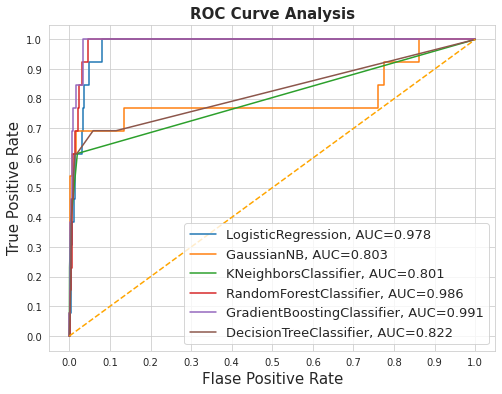

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
  plt.plot(result_table.loc[i]['fpr'], 
          result_table.loc[i]['tpr'],
          label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])
             )
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:

df_result.head(10)

,Model,Accuracy,Precision,Recall,f1-score,auc
0,Basic DT,0.990973,0.222222,0.153846,0.181818,0.575156
1,Optimised DT with Gini,0.955868,0.087912,0.615385,0.153846,0.786743
2,Optimised DT with Entropy,0.939819,0.072000,0.692308,0.130435,0.816876
3,Logistic Regression,0.914744,0.071038,1.000000,0.132653,0.957092
4,Gaussian NB,0.135908,0.007488,1.000000,0.014866,0.565119
5,Random Forest,0.974423,0.183333,0.846154,0.301370,0.910709
6,Gradient Boosting,0.994483,0.625000,0.384615,0.476190,0.691550
7,KNN Classifier,0.994483,0.750000,0.230769,0.352941,0.615132
